In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [3]:
bikes = pd.read_csv('hour.csv')

In [4]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
index         17379 non-null int64
date          17379 non-null object
season        17379 non-null int64
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
demand        17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bikes_prep = bikes.copy()

In [7]:
bikes_prep = bikes_prep.drop(['index','date','casual','registered'],axis=1)

In [11]:
bikes_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null int64
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
demand        17379 non-null int64
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [12]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [14]:
#check null
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

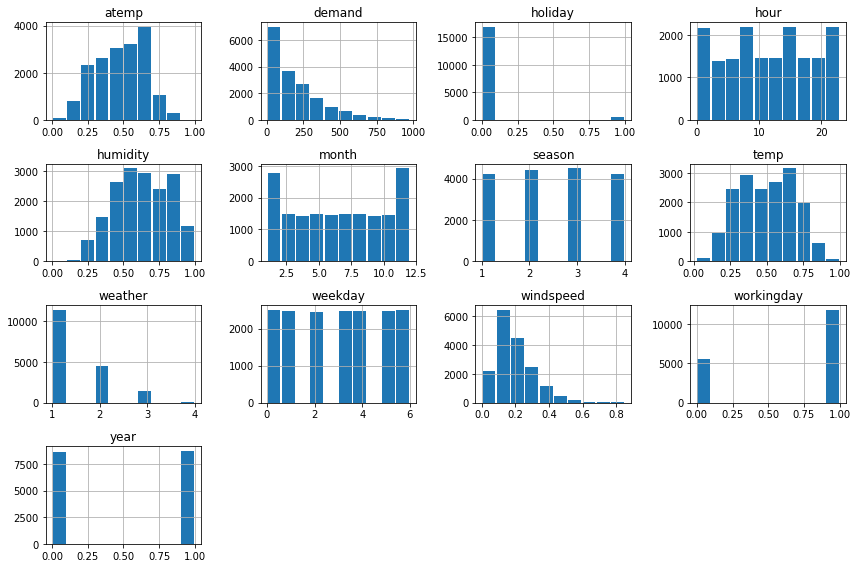

In [40]:
# visualize data
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

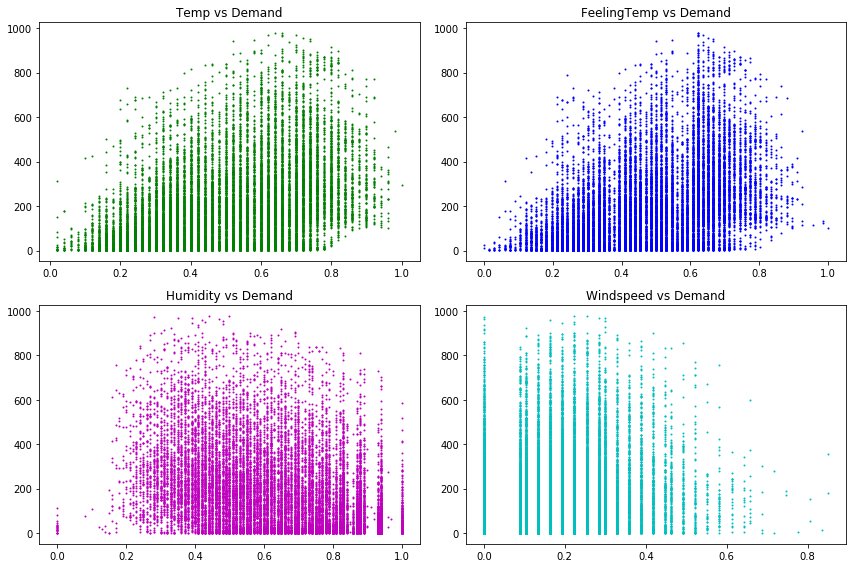

In [32]:
plt.rcParams['figure.figsize'] = [12,8]
plt.subplot(2,2,1)
plt.title('Temp vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=1,c='g')
plt.subplot(2,2,2)
plt.title('FeelingTemp vs Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=1,c='b')
plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=1,c='m')
plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=1,c='c')
plt.tight_layout()

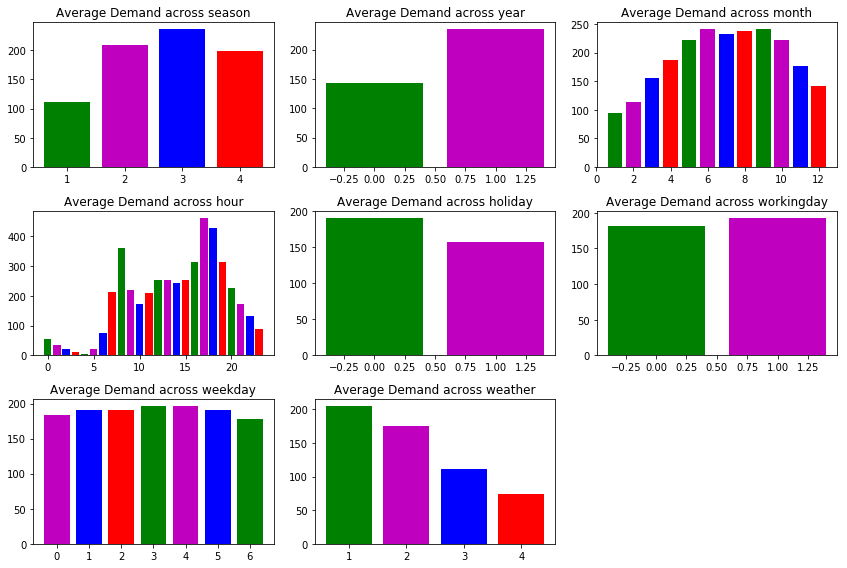

In [46]:
#continuous features visualization
#we can use for loop also to make plot effectively 
plt.subplot(3,3,1)
plt.title('Average Demand across season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.subplot(3,3,2)
plt.title('Average Demand across year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.subplot(3,3,3)
plt.title('Average Demand across month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.subplot(3,3,4)
plt.title('Average Demand across hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.subplot(3,3,5)
plt.title('Average Demand across holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.subplot(3,3,6)
plt.title('Average Demand across workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.subplot(3,3,7)
plt.title('Average Demand across weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.subplot(3,3,8)
plt.title('Average Demand across weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)
plt.tight_layout()

<BarContainer object of 24 artists>

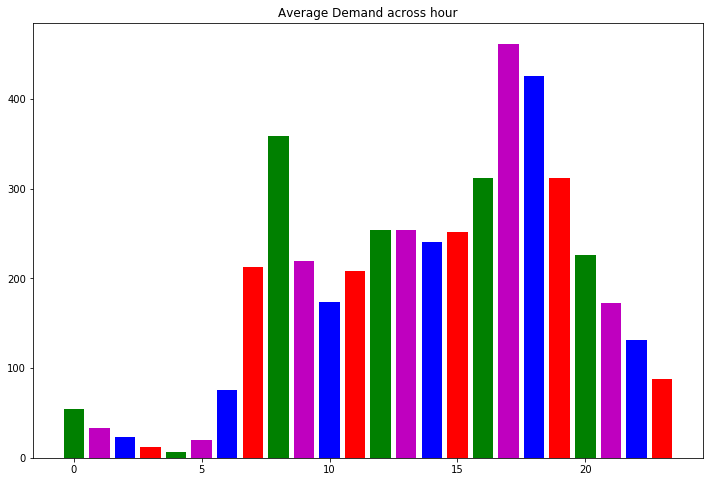

In [47]:
plt.title('Average Demand across hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
c = ['g','m','b','r']
plt.bar(cat_list,cat_average,color = c)

In [51]:
'''Findings : Demand is not normally distributed
Temperature and Demand appears to have direct correlation
the plot for temp and atemp appear almost identical
humidity and windspeed effect demand but need more statistical anlaysis we can drop them
variation in demand based on Season,Month,Holiday,Hour,weather
No significant change due to weekday or woring day
year wise growth pattern not considered due to limited number of years'''

'Demand is not normally distributed\nTemperature and Demand appears to have direct correlation\nthe plot for temp and atemp appear almost identical\nhumidity and windspeed effect demand but need more statistical anlaysis we can drop them\nvariation in demand based on Season,Month,Holiday,Hour,weather\nNo significant change due to weekday or woring day\nyear wise growth pattern not considered due to limited number of years'

In [53]:
# check for outliers
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [56]:
#check outlier
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [65]:
#check multicollinearity
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [67]:
#dropping atemp and windspeed working dAY,
bikes_prep=bikes_prep.drop(['atemp','windspeed','weekday','year','workingday'],axis=1)

In [70]:
bikes_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 8 columns):
season      17379 non-null int64
month       17379 non-null int64
hour        17379 non-null int64
holiday     17379 non-null int64
weather     17379 non-null int64
temp        17379 non-null float64
humidity    17379 non-null float64
demand      17379 non-null int64
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


In [71]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [72]:
#acorr check autocorrelation in demand
df1 = pd.to_numeric(bikes_prep['demand'],downcast = 'float')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x9880432b00>)

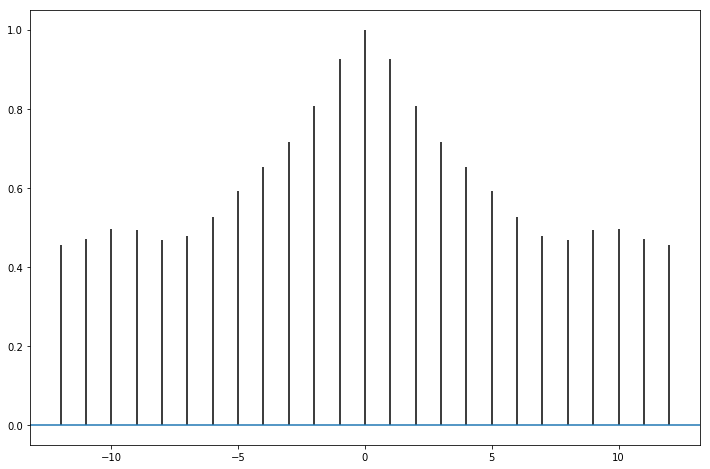

In [75]:
plt.acorr(df1,maxlags=12)

In [76]:
# there is auto correlation for demand feature

In [77]:
#Make demand normally distributed

In [78]:
df2 = bikes_prep['demand'].apply(lambda x : np.log(x))

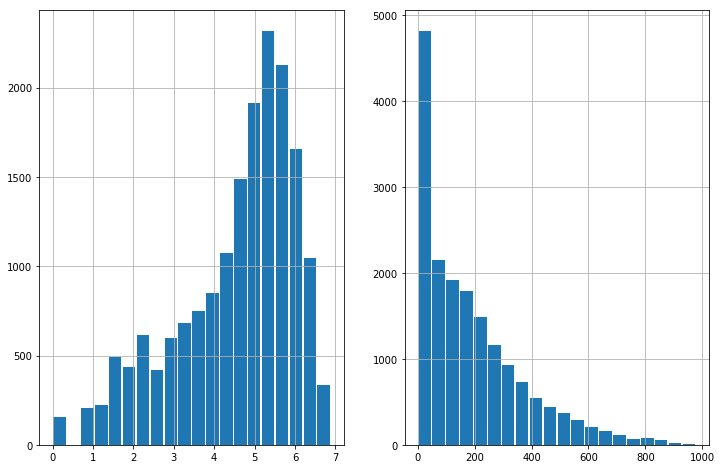

In [88]:
plt.subplot(1,2,1)
df2.hist(rwidth=0.9,bins = 20)
plt.subplot(1,2,2)
bikes_prep['demand'].hist(rwidth = 0.9,bins=20)

In [89]:
bikes_prep['demand']=np.log(bikes_prep['demand'])

In [96]:

#solving autocorrelation prepare lag features
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']
t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']
t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']
bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)

In [98]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [108]:
#create dummy variables
dummy_df = pd.get_dummies(bikes_prep_lag,drop_first=True)
#no changes as we have to change variable into category

In [109]:
l=['season','holiday','weather','month','hour']
for i in l:
    bikes_prep_lag[i] = bikes_prep_lag[i].astype('category')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
bikes_prep_lag.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [115]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag,drop_first=True)

In [118]:
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'],axis =1)

In [123]:
#Create train size for 70% data
tr_size = int(0.7*len(X))

In [127]:
X_train=X.values[0:tr_size]
X_test = X.values[tr_size : len(X)]
Y_train=Y.values[0:tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
std_reg = LinearRegression()

In [131]:
std_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
r2_train = std_reg.score(X_train,Y_train)
r2_train

0.9195240591465778

In [134]:
r2_test = std_reg.score(X_test,Y_test)
r2_test

0.9287151360253384

In [135]:
Y_predict = std_reg.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error

In [138]:
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))

In [139]:
rmse

0.38098800498170443

In [141]:
y_test_e = []
y_pred_e = []
for i in range(0,len(Y_test)):
    y_test_e.append(math.exp(Y_test[i]))
    y_pred_e.append(math.exp(Y_predict[i]))

In [143]:
# calculate RMSLE
sum=0
for i in range(0,len(y_test_e)):
    log_a = math.log(y_test_e[i]+1)
    log_p = math.log(y_pred_e[i]+1)
    log_diff = (log_p - log_a)**2
    sum+=log_diff

In [144]:
RMSLE = math.sqrt(sum/len(y_test_e))

In [145]:
RMSLE

0.3560941706980208